In [1]:
import pandas as pd
import numpy as np
import csv
import requests
import io
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
print("Librerias Importadas")

Librerias Importadas


In [17]:
url = 'https://raw.githubusercontent.com/YandryRo97/Simulaci-n/main/Pr%C3%A1ctica%202/covid.csv'
df = pd.read_csv(url)
print(df)

           date  confirmed  deaths  recovered  day
0    2020-03-01          6       0          0   60
1    2020-03-02          6       0          0   61
2    2020-03-03          7       0          0   62
3    2020-03-04         10       0          0   63
4    2020-03-05         13       0          0   64
..          ...        ...     ...        ...  ...
404  2021-04-09     342678   17158     290314  464
405  2021-04-10     344877   17275     290314  465
406  2021-04-11     346817   17293     290314  466
407  2021-04-12     347070   17298     290314  467
408  2021-04-13     347589   17351     298604  468

[409 rows x 5 columns]


In [18]:
df = df.loc[:,['day','confirmed']]
print(df)

     day  confirmed
0     60          6
1     61          6
2     62          7
3     63         10
4     64         13
..   ...        ...
404  464     342678
405  465     344877
406  466     346817
407  467     347070
408  468     347589

[409 rows x 2 columns]


In [19]:
x=list(df.iloc[:,0])
y=list(df.iloc[:,1])
def funcion(x,a,b):
    return a*np.exp(b*x)
val=curve_fit( funcion,  x,  y)
print(val)
pred_x = list(range(min(x),max(x)+50))

(array([-7.30300897e-13,  9.99999999e-01]), array([[inf, inf],
       [inf, inf]]))


C:\Users\USUARIO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
C:\Users\USUARIO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


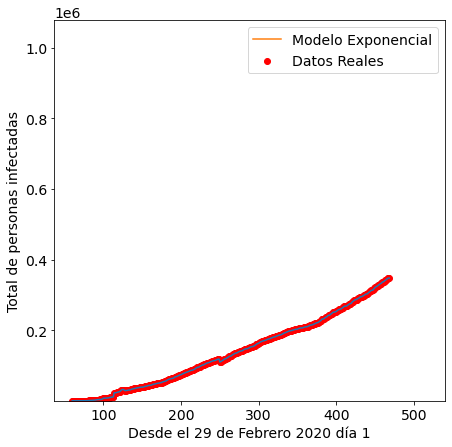

In [21]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(df.loc[:,['day']], df.loc[:,['confirmed']])
plt.plot(pred_x, [funcion(i,val[0][0],val[0][1]) for i in pred_x], label="Modelo Exponencial" )
plt.legend()
plt.xlabel("Desde el 29 de Febrero 2020 día 1")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1))
plt.show()